In [1]:
from rlign import Rlign
from neurokit2.ecg import ecg_simulate
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = ecg_simulate(sampling_rate=100, heart_rate=60, noise=0.35, heart_rate_std=15).reshape(1, 1, 1000)

In [3]:
X.shape

(1, 1, 1000)

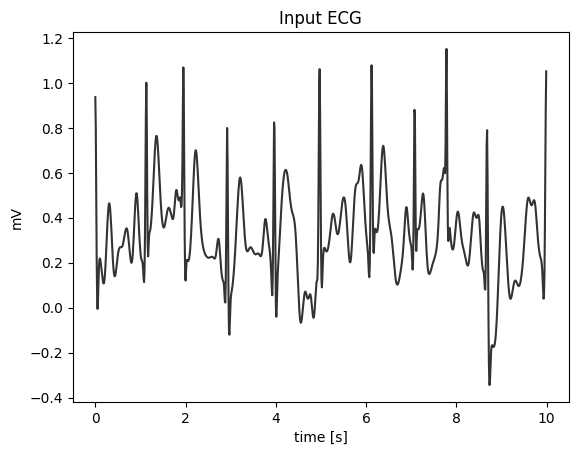

In [4]:
plt.title("Input ECG")
plt.plot(X[0, 0], color="black", alpha=.8)
plt.xticks(range(0, 1001, 200), range(0, 11, 2))
plt.ylabel("mV")
plt.xlabel("time [s]")
plt.show()

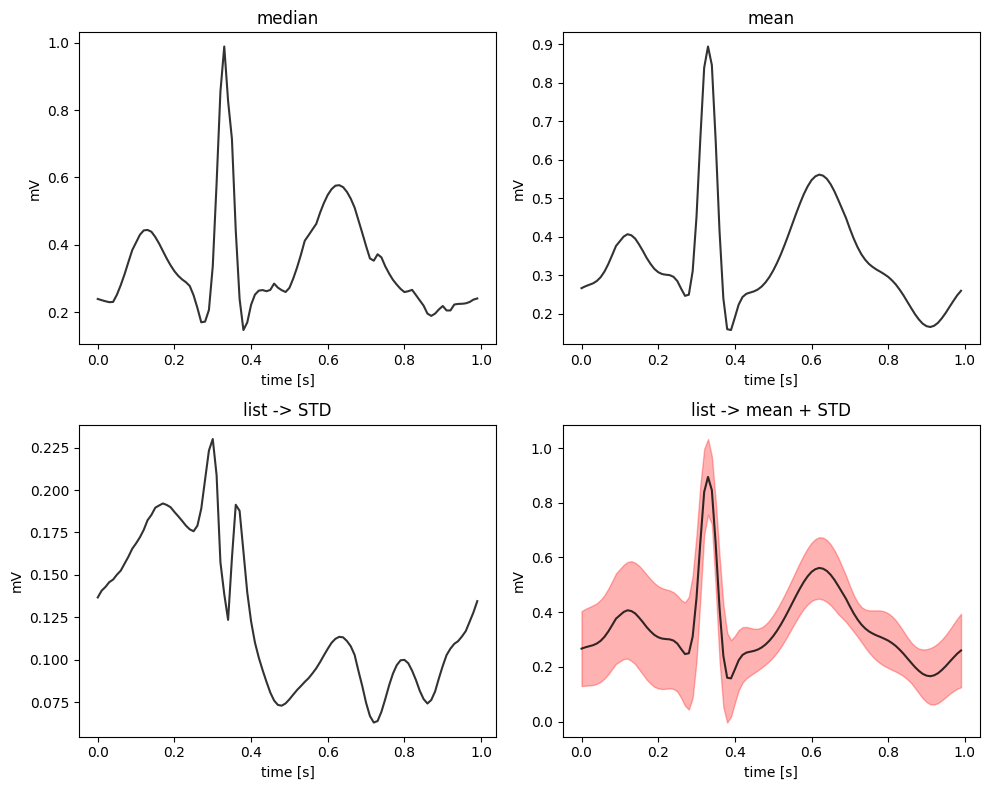

In [5]:
plt.figure(figsize=(10, 8))
for i, agg_beat in enumerate(["median", "mean", "list", "list"]):
    normalizer = Rlign(scale_method='hrc', agg_beat=agg_beat, select_lead=0, sampling_rate=100, seconds_len=10, num_workers=1)
    ecg_aligned = normalizer.transform(X)
    plt.subplot(221+i)
    if agg_beat != "list":
        plt.title(agg_beat)
        plt.plot(ecg_aligned[0, 0], color="black", alpha=.8)
    elif i ==2:
        plt.plot(np.std(ecg_aligned[0][0, :], axis=-1), color="black", alpha=.8)
        plt.title("list -> STD")
    else:
        mn = np.mean(ecg_aligned[0][0, :], axis=-1)
        std = np.std(ecg_aligned[0][0, :], axis=-1)
        plt.plot(mn, color="black", alpha=.8)
        plt.fill_between(range(100), mn-std, mn+std, alpha=.3, color="red")
        plt.title("list -> mean + STD")
    plt.ylabel("mV")
    plt.xlabel("time [s]")
    plt.xticks(range(0, 101, 20), [x / 100 for x in range(0, 101, 20)])
plt.tight_layout()